In [406]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [407]:
experiment = "01_Multiplication" # 506
experiment = "02_Compare" # 507|508|509
# experiment = "03_Share"
# experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "06_LeNet" # 529|530|531
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "12_VGG" # 532|533|534
# experiment = "15_BitAND" # 524
experiment = "16_Division" # 510

framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]
# framworks = ["MPyC", "HPMPC", "mp-slice", "MP-SPDZ"]

data = []
base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [408]:
import pandas as pd


In [409]:
# fl_paths[-1].split("/")[-2]

In [410]:
# runtime/3600

# inputs,label=rf.get_input_deviation(data)
# rf.plot_deviation(inputs,label,"test.png",experiment,"Input size","Runtime [s]",True)

min bandwidths(Mbs)
100      0.032995
1000     0.011986
10000    0.012986
25000    0.011318
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        5.964991
100      5.972990
1000     5.982994
10000    6.226992
25000    6.042991
Name: runtime_external(s), dtype: float64
10000
min bandwidths(Mbs)
100      3.290
1000     1.709
10000    1.588
25000    1.578
Name: runtime_external(s), dtype: float64
1000
min Series([], Name: runtime_external(s), dtype: float64)
10000
min Series([], Name: runtime_external(s), dtype: float64)
1000
min bandwidths(Mbs)
100      109.748000
1000      75.255000
10000     70.567000
25000     70.585333
Name: runtime_external(s), dtype: float64
['HPMPC 43', 'mp-slice 510', 'MP-SPDZ replicated-ring 10000', 'MP-SPDZ semi2k 1000']


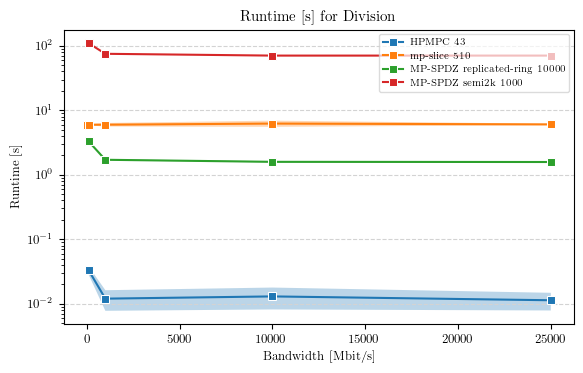

In [411]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[-2] # Auction
# del bandwidth[-2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

del bandwidth[3] # DIVISION
del bandwidth[3]
del label[3]
del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

min latencies(ms)
0     0.011318
25    0.534541
50    1.061986
75    1.583995
Name: runtime_external(s), dtype: float64
min latencies(ms)
0      5.990991
25    29.229996
50    58.655993
75    86.592986
Name: runtime_external(s), dtype: float64
10000
min latencies(ms)
0      1.578
25     8.940
50    15.592
75    22.053
Name: runtime_external(s), dtype: float64
1000
min Series([], Name: runtime_external(s), dtype: float64)
10000
min Series([], Name: runtime_external(s), dtype: float64)
1000
min latencies(ms)
0       70.585333
25     873.190000
50    1673.083333
75    2472.706667
Name: runtime_external(s), dtype: float64


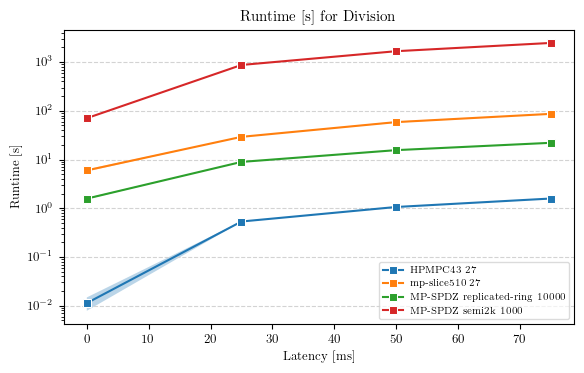

In [412]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del latency[-1]
# del label[-2]
# del latency[-2]

del latency[3] # DIVISION
del latency[3]
del label[3]
del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

# del latency[-7] # LogReg
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

min packetdrops(%)
0    0.011318
1    1.319993
2    2.191992
5    5.921988
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0     5.990991
1    11.111995
2    16.294990
5    36.643992
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    1.578
1    2.596
2    4.111
5    8.739
Name: runtime_external(s), dtype: float64
min Series([], Name: runtime_external(s), dtype: float64)
min Series([], Name: runtime_external(s), dtype: float64)
min packetdrops(%)
0     70.585333
1    146.696000
2    245.566000
5    718.582000
Name: runtime_external(s), dtype: float64
['HPMPC passive adversary 43', 'mp-slice passive adversary 510', 'MP-SPDZ replicated-ring 10000', 'MP-SPDZ semi2k 1000']


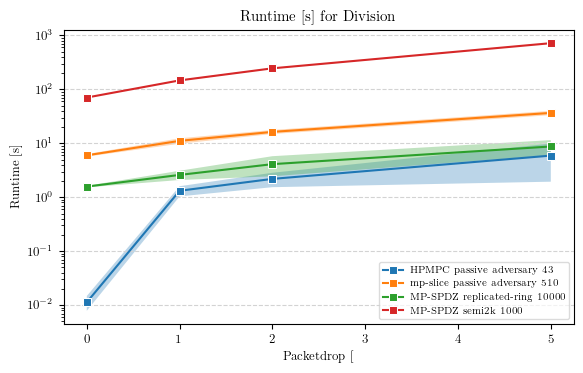

In [413]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[-2] # Auction
# del packetdrop[-2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del packetdrop[-1]
# del label[-2]
# del packetdrop[-2]

del packetdrop[3] # Division
del packetdrop[3]
del label[3]
del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]

print(label)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [%]","Runtime [s]",True)

In [414]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[-2] # Auction
# del bandwidth[-2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

del bandwidth[3] # Division
del bandwidth[3]
del label[3]
del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

[df['mean'].iloc[0] for df in bandwidth]

min bandwidths(Mbs)
100      0.032995
1000     0.011986
10000    0.012986
25000    0.011318
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        5.964991
100      5.972990
1000     5.982994
10000    6.226992
25000    6.042991
Name: runtime_external(s), dtype: float64
10000
min bandwidths(Mbs)
100      3.290
1000     1.709
10000    1.588
25000    1.578
Name: runtime_external(s), dtype: float64
1000
min Series([], Name: runtime_external(s), dtype: float64)
10000
min Series([], Name: runtime_external(s), dtype: float64)
1000
min bandwidths(Mbs)
100      109.748000
1000      75.255000
10000     70.567000
25000     70.585333
Name: runtime_external(s), dtype: float64


[0.032995199999999995, 5.9649912, 3.29, 109.748]

In [415]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.004822730181131845,
 0.3890291398152991,
 0.018257418583505578,
 1.1784057026338566]

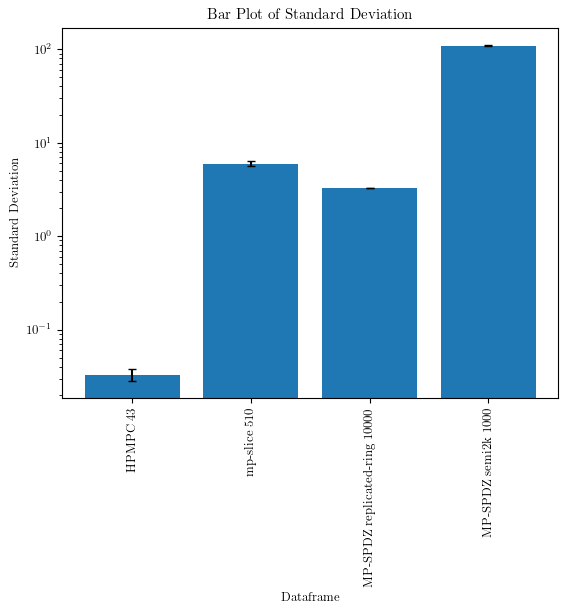

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


In [417]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Example data
# fig, ax = plt.subplots()
# 
# pos = 1
# deviation61 = data[pos].loc[(data[pos]['function'] == 507) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation62 = data[pos].loc[(data[pos]['function'] == 508)  & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation63 = data[pos].loc[(data[pos]['function'] == 509) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# 
# # Plot the first violin plot
# two_dimensional_list = [deviation61, deviation62, deviation63]
# ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# # Set the x-tick labels
# ax.set_xticks([1, 2, 3])
# ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])
# 
# 
# # Set plot title and labels
# plt.title(f"Devation of runtime for {framworks[pos]}: {experiment}")
# plt.xlabel("Comparison Type")
# plt.ylabel("Runtime [s]")
# ax.figure.set_size_inches(5.91, 2.8)
# fig.tight_layout()
# plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
# plt.show()